In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudshaheen1134/irrigation-machine-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'irrigation-machine-dataset' dataset.
Path to dataset files: /kaggle/input/irrigation-machine-dataset


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("/kaggle/input/irrigation-machine-dataset/irrigation_machine.csv")
x_features = data.iloc[:,1:-3]
feature_names = x_features.columns.tolist()
x = data.iloc[:,1:-3].values

In [ ]:
print(x[0])

[1. 2. 1. 7. 0. 1. 1. 4. 0. 3. 1. 3. 6. 8. 1. 0. 2. 1. 9. 2.]


In [7]:
#Standarize the data
sc = StandardScaler()
x = sc.fit_transform(x)

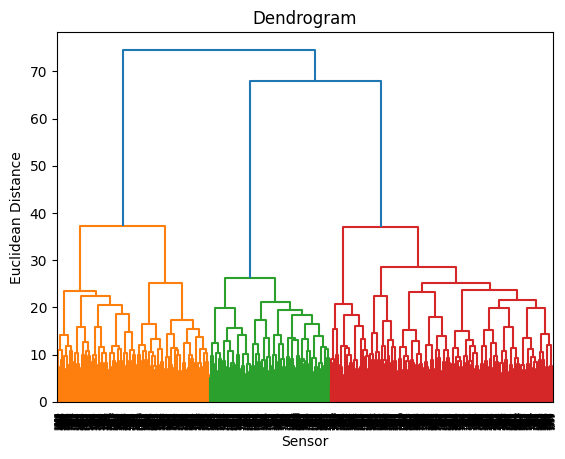

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Sensor")
plt.ylabel("Euclidean Distance")
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,metric="euclidean",linkage="ward")
y_hc = hc.fit_predict(x)

In [12]:
import pandas as pd

df = pd.DataFrame(x, columns=feature_names)
df['cluster'] = y_hc
cluster_means = df.groupby('cluster').mean()

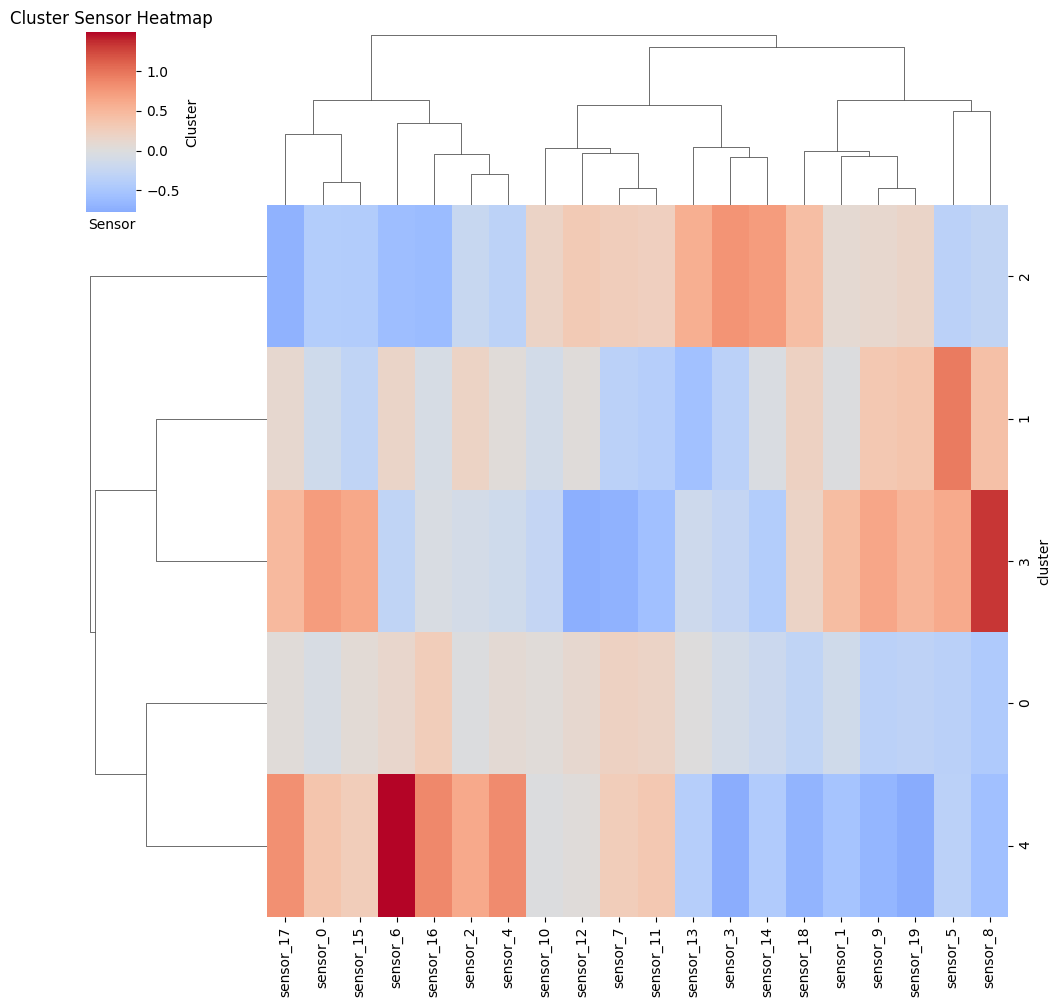

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(
    cluster_means,
    cmap="coolwarm",
    center=0,
    annot=False,
    row_cluster=True,
    col_cluster=True
)
plt.title("Cluster Sensor Heatmap")
plt.ylabel("Cluster")
plt.xlabel("Sensor")
plt.show()